

# Project: Investigate a Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected the movie dataset for analysis. I have chosen to ask if revenues (adjusted for inflation) have been affected over time, and if movie runtimes have been affected over time. My dependant variable is time. My independant variables are revenues and runtimes. I hope to learn how overtime movie trends have changed and if there is any correlation with the independant variables over time.


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



### General Properties
In this section I will clean my dataset for any missing data or duplicates.

In [3]:
# Here I am loading my data and performing operations to inspect the data. I want to see the column headings, the size of the
# dataset, and all interesting stats with the describe function.

df = pd.read_csv('tmdb-movies.csv')
df.head(1)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
#I decided to drop the following columns as they were not necessary to answer the questions I am asking. 

df.drop(['homepage','tagline','keywords','overview','production_companies'], axis=1, inplace=True)

In [8]:
#Here I am coirfming the columns have been dropped and the size of the dataset has changed.

df.shape

(10866, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


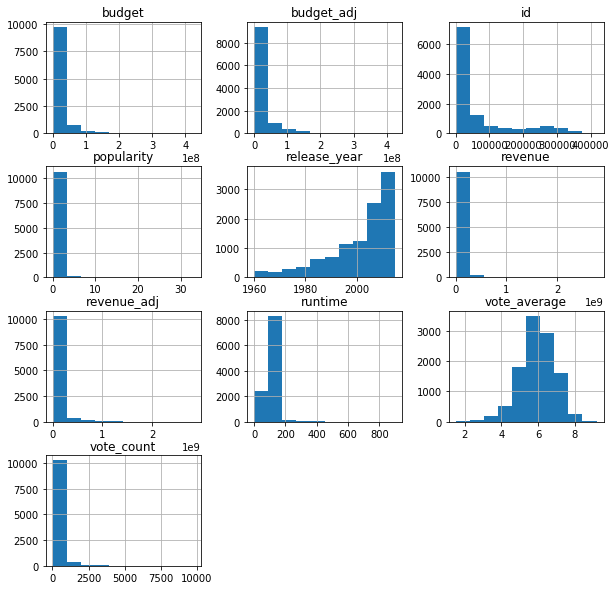

In [10]:
# I want to get an over view of the trends in the dataset.

df.hist(figsize=(10,10));

In [11]:
# The information in the dataset has now been cleaned, but there is some missing data in the dataset.
# Missing members of the cast, imdb_id, director, genres all have missing data. Because none of this data is numberic
# and cannot be replace by a mean, and because the quantities are low, I decided to drop those missing values.
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


In [12]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10727 entries, 0 to 10865
Data columns (total 16 columns):
id                10727 non-null int64
imdb_id           10727 non-null object
popularity        10727 non-null float64
budget            10727 non-null int64
revenue           10727 non-null int64
original_title    10727 non-null object
cast              10727 non-null object
director          10727 non-null object
runtime           10727 non-null int64
genres            10727 non-null object
release_date      10727 non-null object
vote_count        10727 non-null int64
vote_average      10727 non-null float64
release_year      10727 non-null int64
budget_adj        10727 non-null float64
revenue_adj       10727 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB


<a id='eda'></a>
## Exploratory Data Analysis

Now I have trimmed are cleaned my data, I can start looking at the first question.

### Have movie revenues grown over time?

In [13]:
# I want to see the mean release year, so that I can see if revenues have changes on either side of this year. 


In [14]:
# Here we can see the mean year is 2001
df.release_year.mean()

2001.2568285634381

In [15]:
df.groupby('release_year').mean()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,
1960,15715.281250,0.458932,6.892796e+05,4.531406e+06,110.656250,77.531250,6.325000,5.082036e+06,3.340991e+07
1961,18657.000000,0.422827,1.488290e+06,1.089420e+07,119.419355,77.580645,6.374194,1.085687e+07,7.947167e+07
1962,17001.062500,0.454783,1.710066e+06,6.736870e+06,124.343750,74.750000,6.343750,1.232693e+07,4.856238e+07
1963,16556.000000,0.502706,2.156809e+06,5.511911e+06,111.323529,82.823529,6.329412,1.535687e+07,3.924580e+07
1964,17379.571429,0.412428,9.400753e+05,8.118614e+06,109.214286,74.690476,6.211905,6.608980e+06,5.707603e+07
1965,17564.714286,0.342587,2.005860e+06,1.308805e+07,118.171429,52.000000,6.194286,1.388168e+07,9.057670e+07
1966,16514.000000,0.304112,1.251191e+06,1.842102e+06,106.891304,31.739130,6.128261,8.405522e+06,1.237527e+07
1967,16167.526316,0.489084,2.648737e+06,1.941670e+07,108.921053,80.815789,6.281579,1.731417e+07,1.269224e+08
1968,17836.868421,0.495726,1.893132e+06,6.966657e+06,109.947368,110.657895,6.371053,1.186797e+07,4.367372e+07


In [16]:
# Here I create two sets for before and after 2001.

old_films= df[df.release_year < 2001]
new_films= df[df.release_year >=2001]

In [17]:
# Here I look at the average mean revenue of each new set using the revenue adjusted column.
old_films.revenue_adj.mean(), new_films.revenue_adj.mean()

(63913124.593711883, 45232158.811315037)

In [18]:
# Now that I want to create a graph, I create the sets with the average revenue.
old_films_rev= old_films.revenue_adj.mean()
new_films_rev= new_films.revenue_adj.mean()

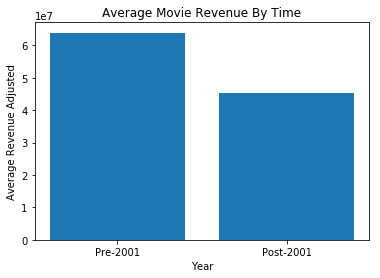

In [19]:
# Here I am plotting the graph, its clear that by using mean year and adjusted revenue, the revenue was higher
# in older movies pre-2001. This seems unusual as I was expecting more recent movies to have an accumulated higher revenue.

locations = [1, 2]
heights = [old_films_rev, new_films_rev]
labels = ['Pre-2001', 'Post-2001']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Movie Revenue By Time')
plt.xlabel('Year')
plt.ylabel('Average Revenue Adjusted');


In [20]:
# This plot shows the movie revenue has decreased when taking the average of the number of movies over time.

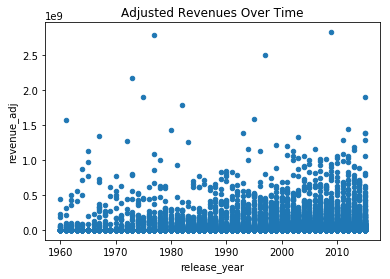

In [21]:
# I am plotting a scatter graph to explain the results from above. It's clear that although there is a positive trend in 
# the increase of revenue over time, there are older movies with an acculuated higher revenue. 
df.plot(x='release_year', y='revenue_adj', kind='scatter')
plt.title('Adjusted Revenues Over Time');

In [22]:
#This plot shows the revenues have increased over time.

In [23]:
#In answer to the question;
# Movie revenues have decreased over time. The scatter graph showing the increase in revenues
# also shows the number of movies has increased, so it doesn't allow us to see a break down of 
# actual movie revenues.
# In the bar chart we can see that revenues have actually decreased over time, based on the average number of movies.

### How have movie runtimes been affected over time?

In [24]:
# I am creating the new groups with the year mean
old_films2= df[df.release_year < 2001]
new_films2= df[df.release_year >=2001]

In [25]:
# Checking the result manually
old_films2.runtime.mean()


106.71161240707511

In [26]:
new_films2.runtime.mean()

100.08159976560211

In [27]:
# Creating the sets for the graphs
old_films_runtime= old_films2.runtime.mean()
new_films_runtime= new_films2.runtime.mean()

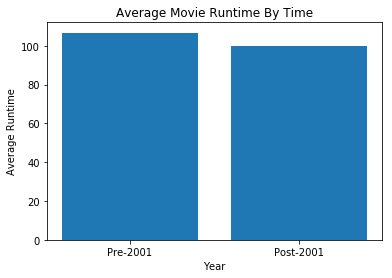

In [28]:
# Plotting the graph. This shows movie runtimes have decreased over time.
locations = [1, 2]
heights = [old_films_runtime, new_films_runtime]
labels = ['Pre-2001', 'Post-2001']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Movie Runtime By Time')
plt.xlabel('Year')
plt.ylabel('Average Runtime');

In [29]:
# This plot shows movie runtimes have decreased over time when looking at the average number of movies.

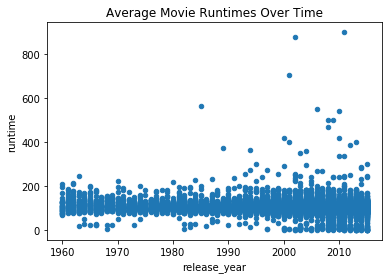

In [30]:
#I plotted a scatter graph as well to get more detail in to this pattern, and again it is clear that runtimes 
# are decreasing over time.
df.plot(x='release_year', y='runtime', kind='scatter')
plt.title('Average Movie Runtimes Over Time');

In [31]:
# This plot shows movie runtimes are decreasing over time, as well as an increase in short films and long films.

In [32]:
# I can conclude that movie runtimes are decreasing over time, even though there is an increase in longer movies over time.

<a id='conclusions'></a>
## Conclusions

Revenues: In summary we see that although more movies are being made over time, the accumulative revenues are dropping.
Limitations to this conclusion are the missing and null values which I removed from the data set in order to make the analysis easier.

Run Time:
In answer to the question, movie runtimes have decreased over time. This is important as it shows a change in movie length trends. There is an increase in short films, and extremely long films but the general trend shows that runtimes are being reduced. This finding could be limited in that null and missing values were removed in order to analyse the data.





## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [35]:
df.to_csv('movie_data.csv', index=False)

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0